# Problem Statement:
Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset:

In [2]:
df=pd.read_csv("global_power_plant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis:

In [3]:
df.shape

(907, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('____________')

IND    907
Name: country, dtype: int64
____________
India    907
Name: country_long, dtype: int64
____________
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
____________
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
____________
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
____________
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554 

We can observe that 'country' , 'country long' ,'other_fuel2','year_of_capacity_data' & 'generation_data_source' columns contains only one unique element,so we can drop those columns.

In [7]:
df=df.drop(['country','country_long','other_fuel2','year_of_capacity_data','generation_data_source'],axis=1)

In [8]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel3,commissioning_year,owner,...,geolocation_source,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,...,WRI,NaN,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,...,WRI,NaN,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,NaN


In [9]:
df.head(1)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel3,commissioning_year,owner,...,geolocation_source,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()


name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64

We can see  many columns containing heavy missing data.Let's drop the columns which are not useful.

In [11]:
df.drop(['other_fuel3','gppd_idnr','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

name                     0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [13]:
df.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [14]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [15]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


# Data Cleaning:

In [16]:
df["latitude"] = df['latitude'].fillna(df['latitude'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

In [17]:
df.head(2)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [18]:
df.isnull().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [19]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [20]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())

In [21]:
df.isnull().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year       0
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer
emb=SimpleImputer(strategy="most_frequent")
df['other_fuel1']=emb.fit_transform(df['other_fuel1'].values.reshape(-1, 1))
df['commissioning_year']=emb.fit_transform(df['commissioning_year'].values.reshape(-1, 1))
df['geolocation_source']=emb.fit_transform(df['geolocation_source'].values.reshape(-1, 1))

In [23]:
df.isnull().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                  565
source                   0
url                      0
geolocation_source       0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [24]:
df.drop("owner",axis=1,inplace=True)

In [25]:
df.drop(["name","url",'other_fuel1'],axis=1,inplace=True)

<AxesSubplot:>

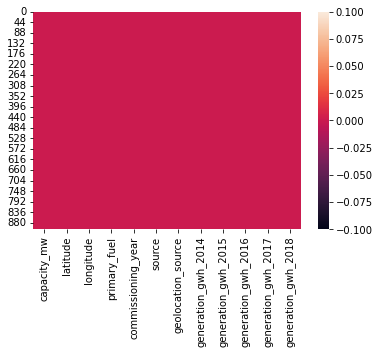

In [26]:
sns.heatmap(df.isnull())

# Data Visualisation:

Univariate Analysis:

In [27]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

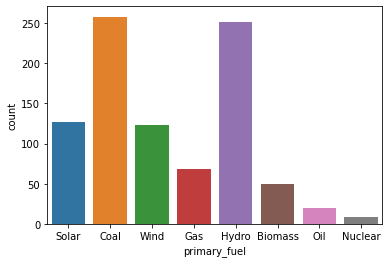

In [28]:
sns.countplot(df['primary_fuel'])

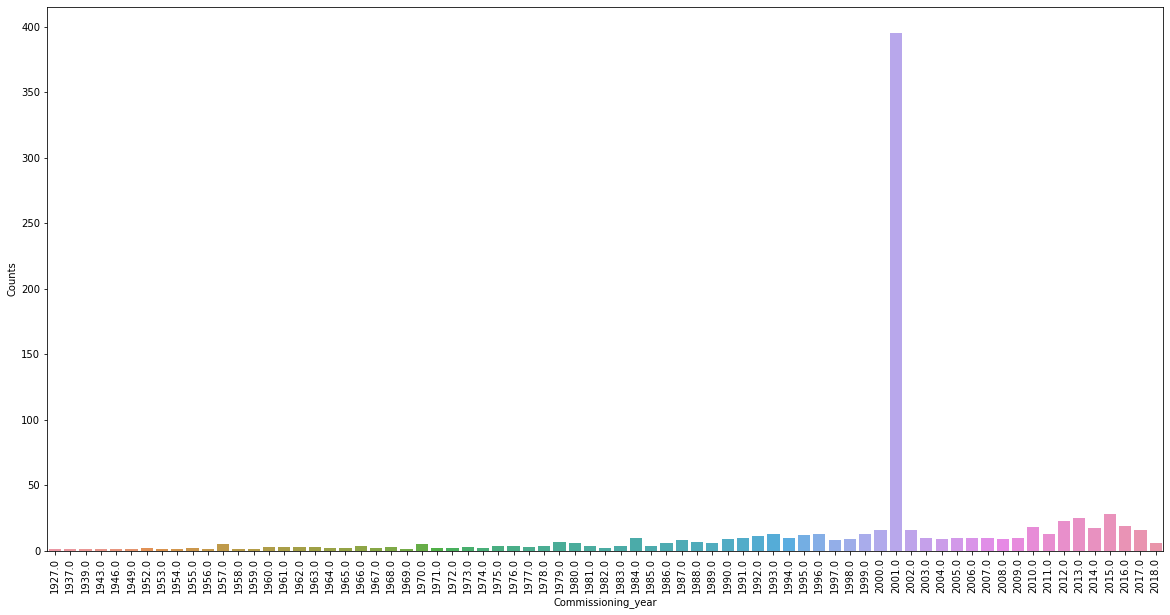

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(df['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 10)
plt.ylabel('Counts', fontsize= 10)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='Density'>

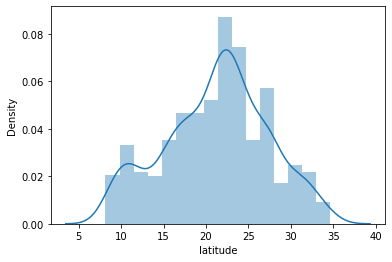

In [30]:
sns.distplot(df["latitude"])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

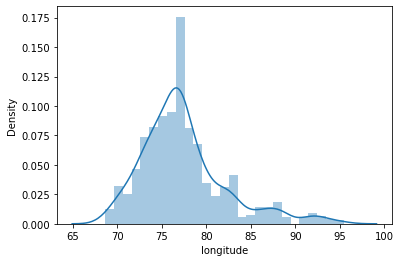

In [31]:
sns.distplot(df["longitude"])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

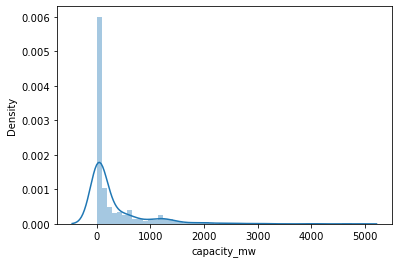

In [32]:
sns.distplot(df["capacity_mw"])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

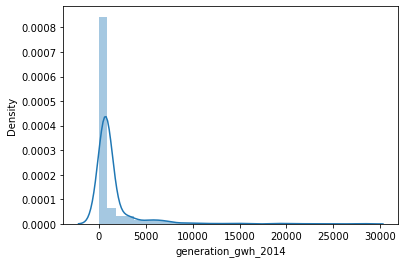

In [33]:
sns.distplot(df["generation_gwh_2014"])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

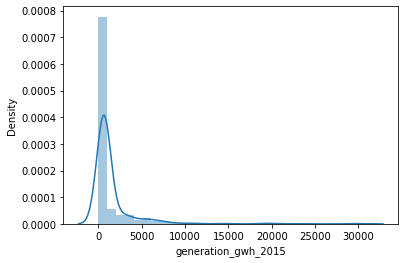

In [34]:
sns.distplot(df["generation_gwh_2015"])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

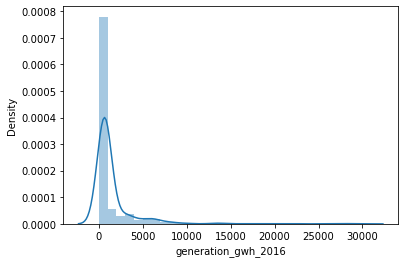

In [35]:
sns.distplot(df["generation_gwh_2016"])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

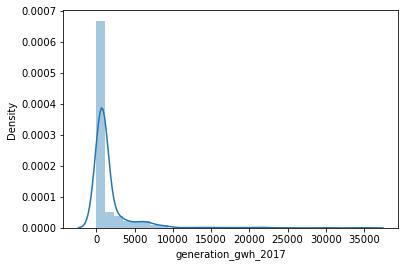

In [36]:
sns.distplot(df["generation_gwh_2017"])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

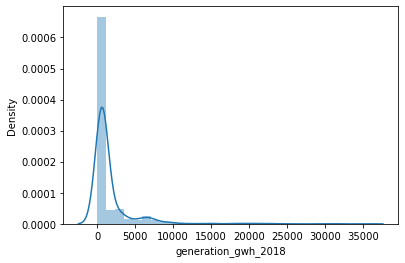

In [37]:
sns.distplot(df["generation_gwh_2018"])

Bivariate Analysis:

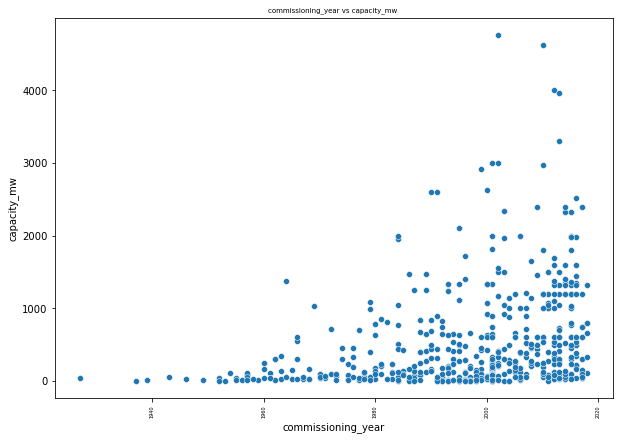

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='commissioning_year',y='capacity_mw')
plt.title('commissioning_year vs capacity_mw ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

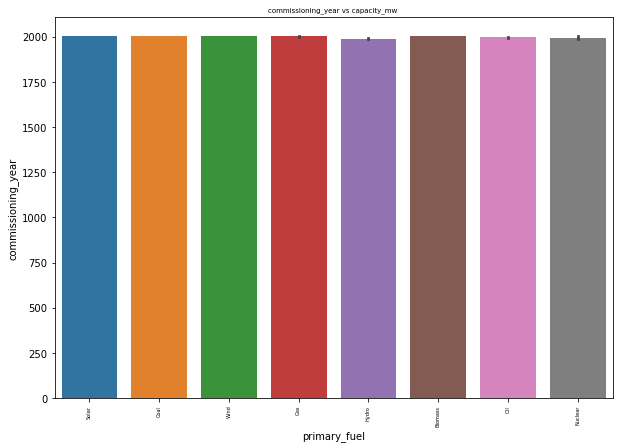

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='primary_fuel',y='commissioning_year')
plt.title('commissioning_year vs capacity_mw ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

<Figure size 720x504 with 0 Axes>

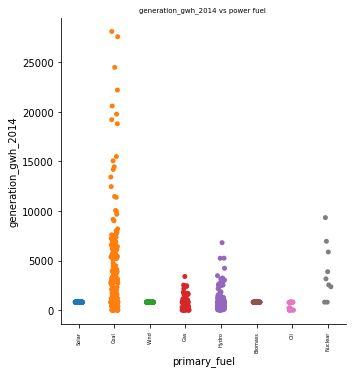

In [40]:
plt.figure(figsize=(10,7))
sns.catplot(data=df, x='primary_fuel',y='generation_gwh_2014')
plt.title('generation_gwh_2014 vs power fuel ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

<Figure size 720x504 with 0 Axes>

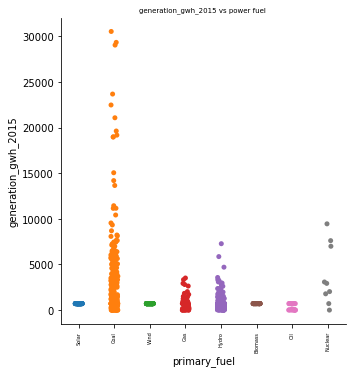

In [41]:
plt.figure(figsize=(10,7))
sns.catplot(data=df, x='primary_fuel',y='generation_gwh_2015')
plt.title('generation_gwh_2015 vs power fuel ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

<Figure size 720x504 with 0 Axes>

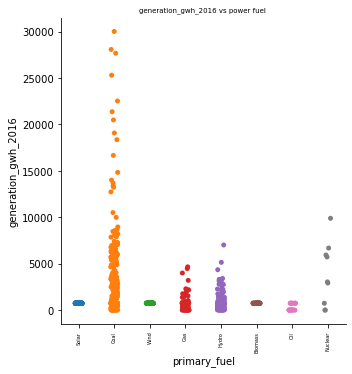

In [42]:
plt.figure(figsize=(10,7))
sns.catplot(data=df, x='primary_fuel',y='generation_gwh_2016')
plt.title('generation_gwh_2016 vs power fuel ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

<Figure size 720x504 with 0 Axes>

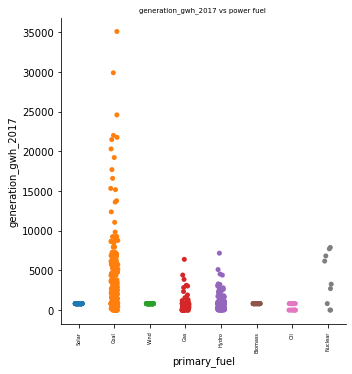

In [43]:
plt.figure(figsize=(10,7))
sns.catplot(data=df, x='primary_fuel',y='generation_gwh_2017')
plt.title('generation_gwh_2017 vs power fuel ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

<Figure size 720x504 with 0 Axes>

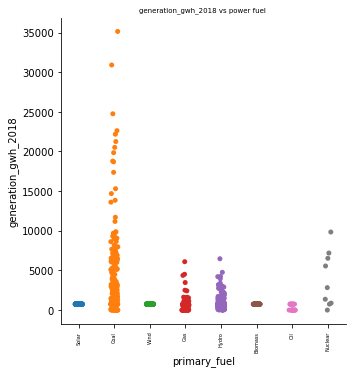

In [44]:
plt.figure(figsize=(10,7))
sns.catplot(data=df, x='primary_fuel',y='generation_gwh_2018')
plt.title('generation_gwh_2018 vs power fuel ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

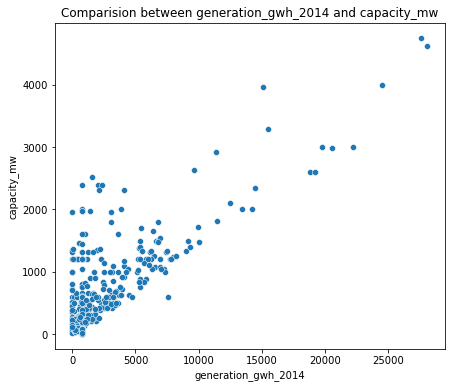

In [45]:
plt.figure(figsize = (7,6))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x="generation_gwh_2014",y="capacity_mw", data=df)
plt.show()

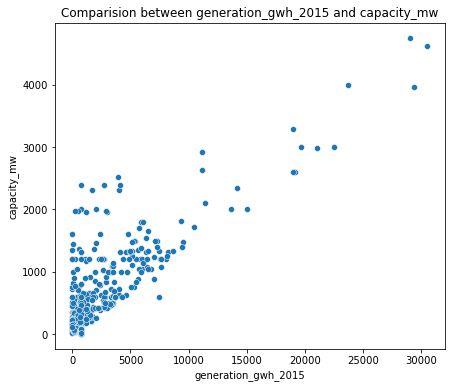

In [46]:
plt.figure(figsize = (7,6))
plt.title("Comparision between generation_gwh_2015 and capacity_mw")
sns.scatterplot(x="generation_gwh_2015",y="capacity_mw", data=df)
plt.show()

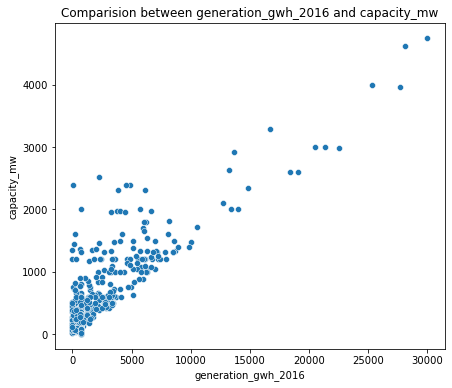

In [47]:
plt.figure(figsize = (7,6))
plt.title("Comparision between generation_gwh_2016 and capacity_mw")
sns.scatterplot(x="generation_gwh_2016",y="capacity_mw", data=df)
plt.show()

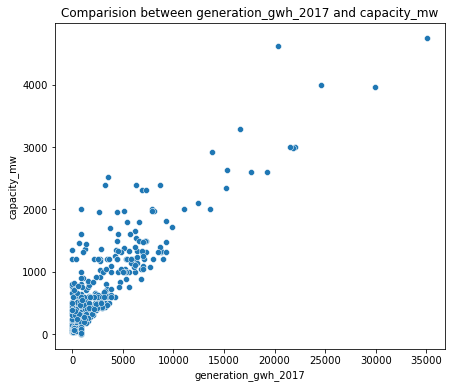

In [48]:
plt.figure(figsize = (7,6))
plt.title("Comparision between generation_gwh_2017 and capacity_mw")
sns.scatterplot(x="generation_gwh_2017",y="capacity_mw", data=df)
plt.show()

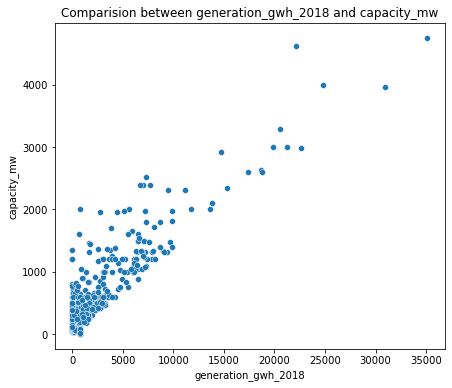

In [49]:
plt.figure(figsize = (7,6))
plt.title("Comparision between generation_gwh_2018 and capacity_mw")
sns.scatterplot(x="generation_gwh_2018",y="capacity_mw", data=df)
plt.show()

# Multivariate Analysis:

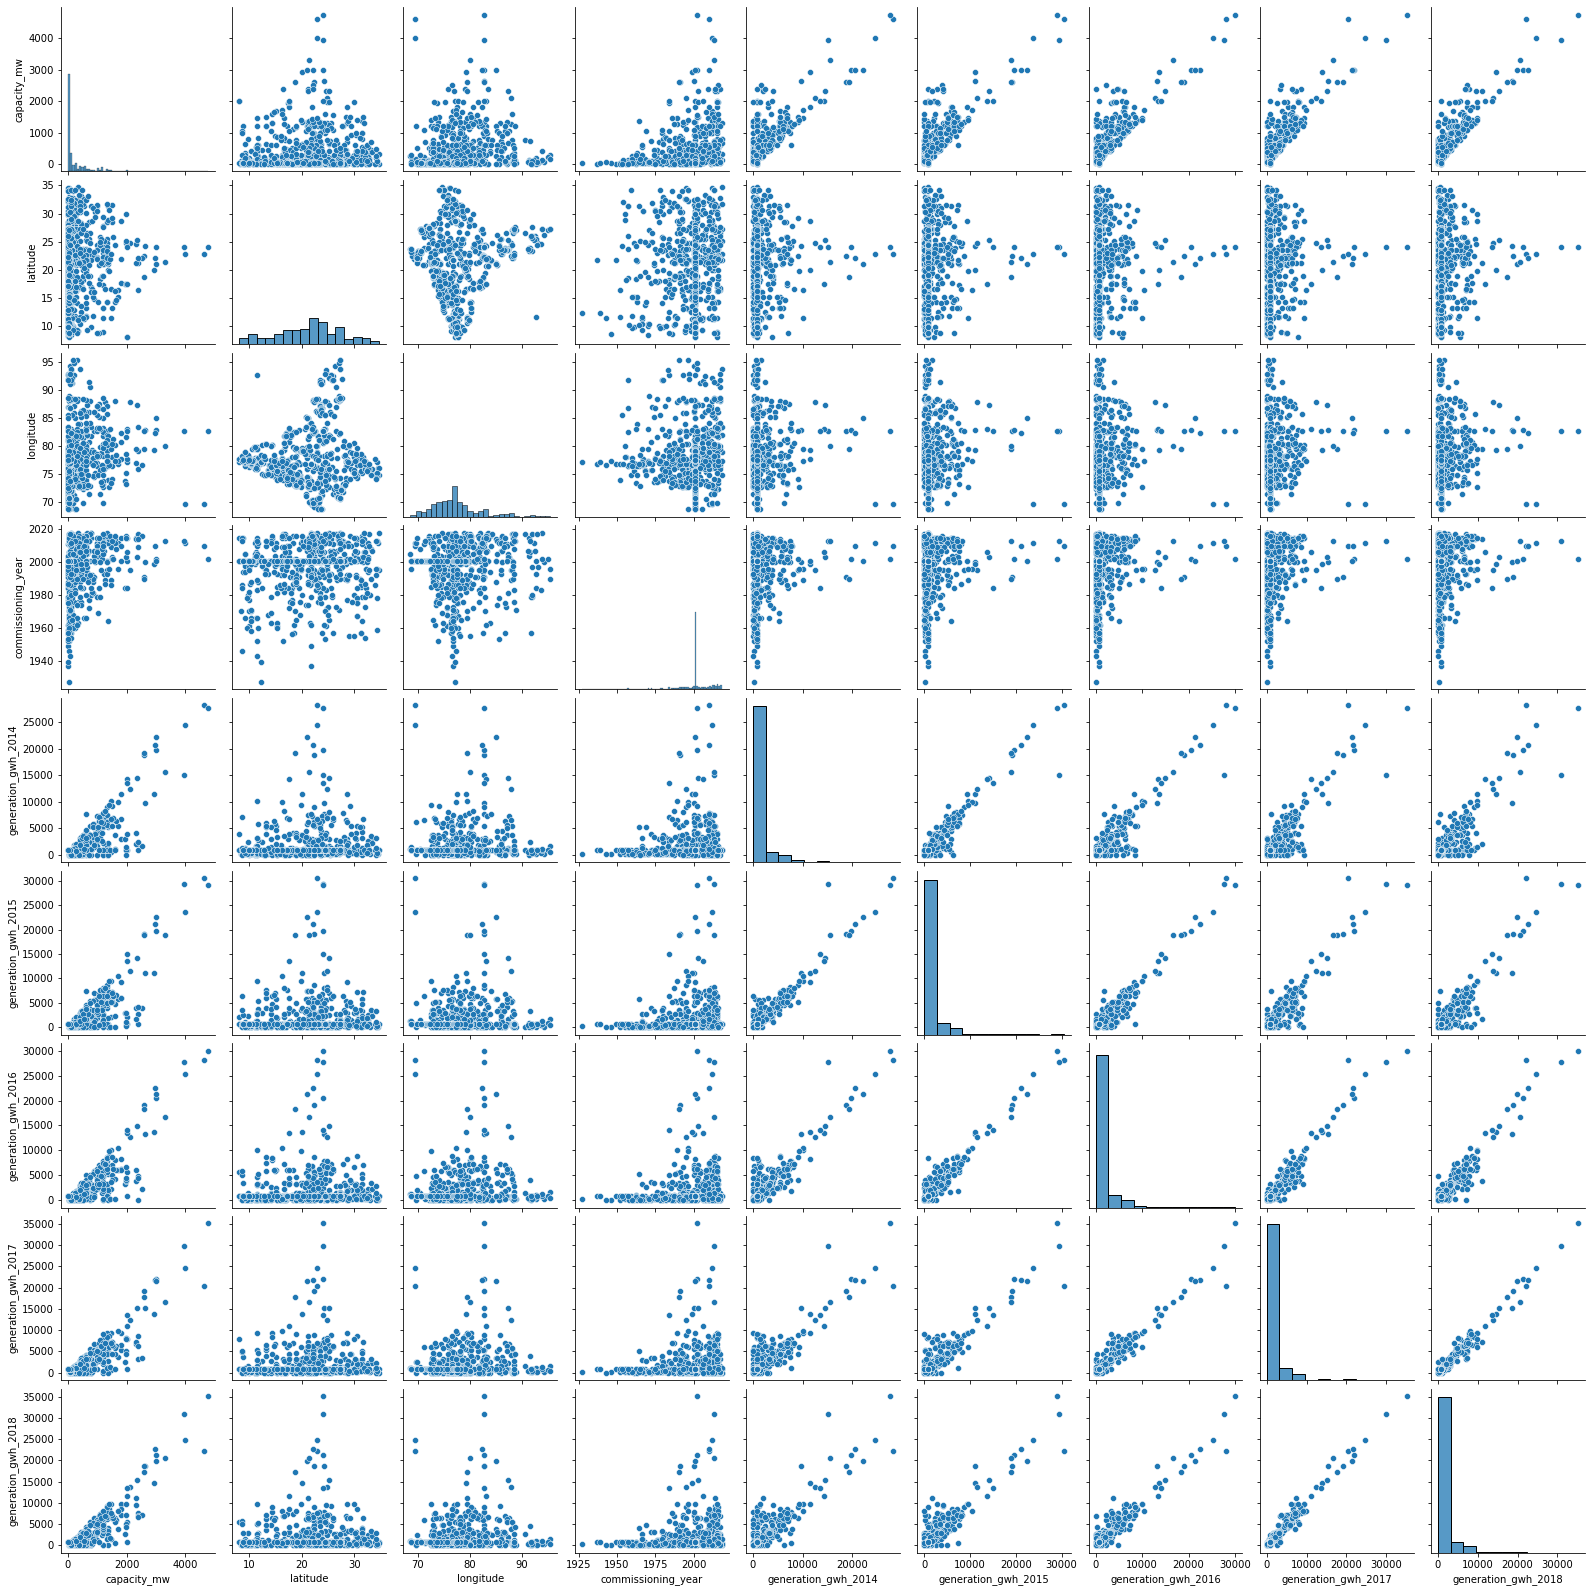

In [50]:
sns.pairplot(df)

In [51]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [52]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Outliers Check:

<AxesSubplot:>

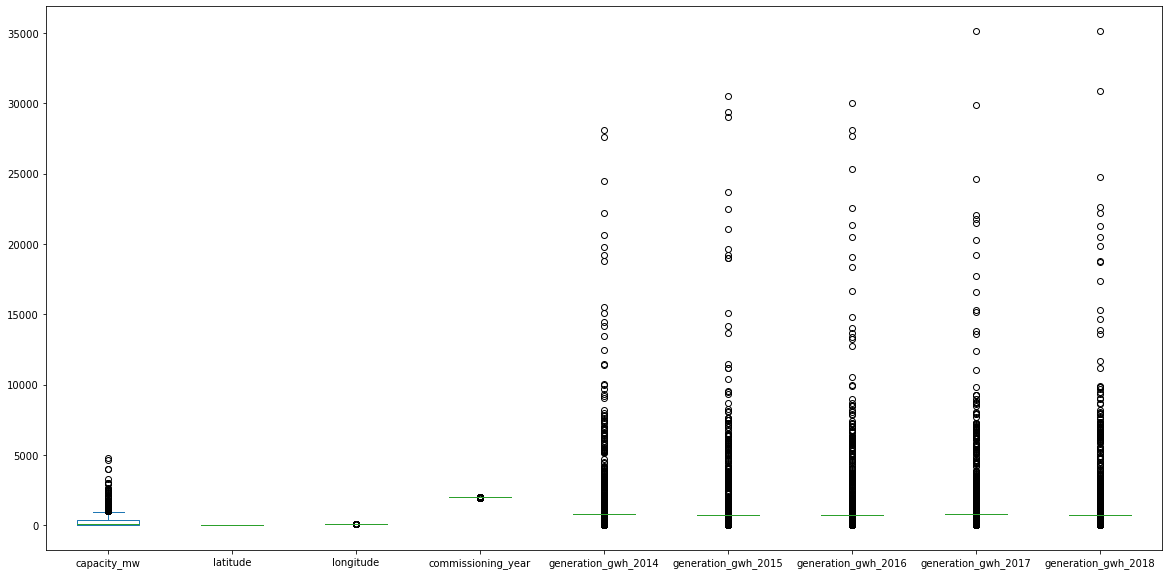

In [53]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing Outliers:

In [54]:
cols=df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [55]:
from scipy.stats import zscore
z=np.abs(zscore(cols))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [56]:
df.shape

(907, 12)

In [57]:
df_new.shape

(871, 12)

# Percentage of Loss:

In [58]:
loss=((907-871)/907)*100
loss

3.9691289966923926

# Skewness:

In [59]:
df_new.skew()

capacity_mw            2.207091
latitude              -0.126794
longitude              0.960278
commissioning_year    -1.735483
generation_gwh_2014    2.978658
generation_gwh_2015    2.752239
generation_gwh_2016    2.682074
generation_gwh_2017    2.581940
generation_gwh_2018    2.634701
dtype: float64

In [60]:
sk=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [61]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [62]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

In [63]:
df_new.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

# Encoding:

In [64]:
cat_cols=[]
for i in df_new.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['primary_fuel', 'source', 'geolocation_source']


In [65]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_new[cat_cols]=df_new[cat_cols].apply(enc.fit_transform)

# Correlation:

In [66]:
df_new.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.047273,0.248179,-0.395254,0.244169,-0.267822,0.228364,0.466928,0.518503,0.581178,0.602364,0.611622
latitude,0.047273,1.000000,-0.008926,0.000058,0.087748,0.065905,-0.196598,0.108615,0.103705,0.124835,0.105964,0.111635
longitude,0.248179,-0.008926,1.000000,-0.378734,0.034890,-0.236572,0.263454,0.034633,0.038976,0.096812,0.081721,0.103282
primary_fuel,-0.395254,0.000058,-0.378734,1.000000,-0.052034,0.039778,-0.478696,-0.135754,-0.152945,-0.169552,-0.154784,-0.168056
commissioning_year,0.244169,0.087748,0.034890,-0.052034,1.000000,0.104561,-0.076632,0.107507,0.147526,0.215532,0.198613,0.190022
source,-0.267822,0.065905,-0.236572,0.039778,0.104561,1.000000,-0.500208,-0.014530,-0.017923,-0.015915,-0.010618,-0.022528
geolocation_source,0.228364,-0.196598,0.263454,-0.478696,-0.076632,-0.500208,1.000000,0.011662,0.014385,0.012774,0.008522,0.018081
generation_gwh_2014,0.466928,0.108615,0.034633,-0.135754,0.107507,-0.014530,0.011662,1.000000,0.841661,0.786229,0.715993,0.717419
generation_gwh_2015,0.518503,0.103705,0.038976,-0.152945,0.147526,-0.017923,0.014385,0.841661,1.000000,0.881873,0.773826,0.772907
generation_gwh_2016,0.581178,0.124835,0.096812,-0.169552,0.215532,-0.015915,0.012774,0.786229,0.881873,1.000000,0.897152,0.886958


<AxesSubplot:>

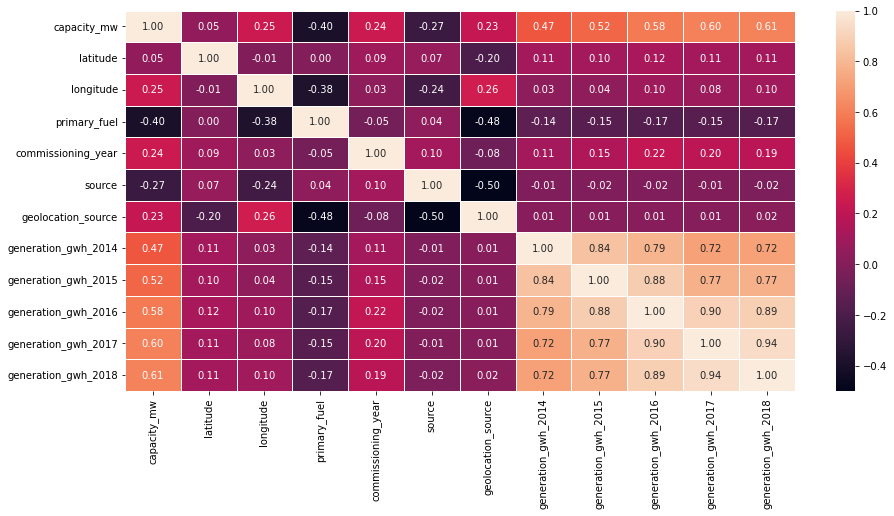

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

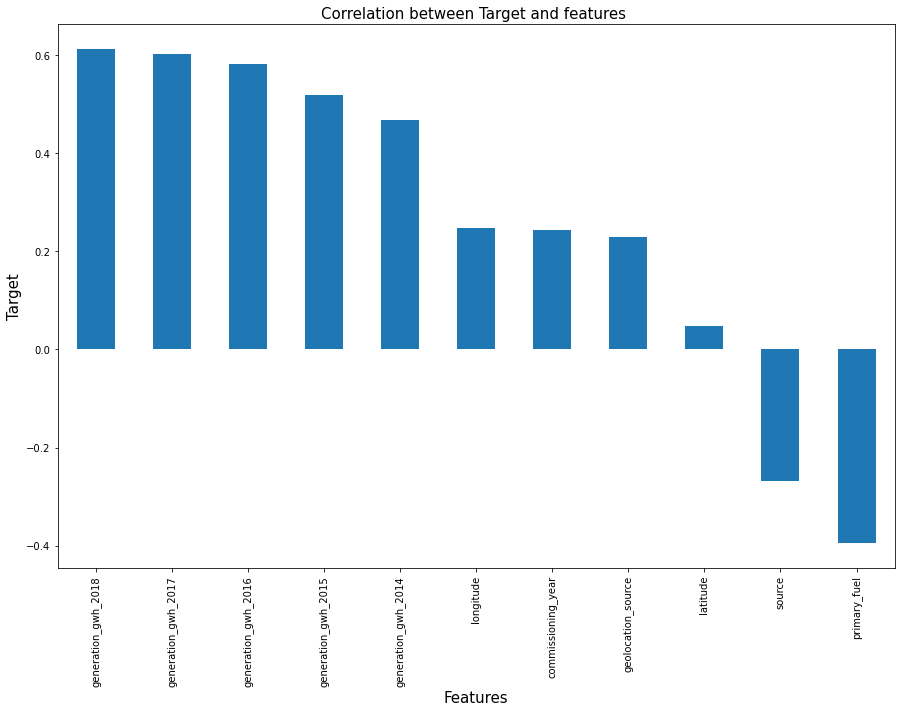

In [68]:
plt.figure(figsize=(15,10))
df_new.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

# Seperating the columns into features and target as X and Y:

In [69]:
x=df_new.drop('capacity_mw',axis=1)
y=df_new['capacity_mw']

# Scaling:

In [70]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.148652,-0.886327,1.191735,0.929761,1.421876,-1.056082,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
1,0.591342,-0.568782,-0.984368,0.176018,2.858110,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
2,0.124554,-1.783867,1.626956,0.176018,-0.522564,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
3,0.445378,3.318713,-0.549148,0.402141,-0.500469,0.401679,-0.254510,0.107749,0.120391,-0.186140,-0.182719
4,0.133767,1.241408,-0.984368,1.231259,-0.500469,0.401679,1.443372,2.304539,2.292390,1.999708,2.366235
...,...,...,...,...,...,...,...,...,...,...,...
866,-0.790092,0.068908,-0.984368,1.306633,-0.500469,0.401679,-0.029032,-2.472163,-0.830994,0.024967,-0.114246
867,-1.344808,0.256561,1.191735,0.176018,0.714806,-2.513844,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
868,-0.956277,-0.343184,1.626956,0.176018,-0.522564,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
869,0.523456,-0.768666,-0.984368,0.176018,0.317080,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013


# VIF:

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.074747,latitude
1,1.262709,longitude
2,1.654712,primary_fuel
3,1.081800,commissioning_year
4,1.527356,source
5,1.970966,geolocation_source
6,3.599703,generation_gwh_2014
7,6.227158,generation_gwh_2015
8,10.060687,generation_gwh_2016
9,9.819500,generation_gwh_2017


# Finding Best Random State:

In [72]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [73]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8868863217496522  on Random_state  78


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=78)

# Random Forest Regressor:

In [75]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.8789723494218841
MAE: 74.48614093506492
MSE: 21141.963170859355
RMSE: 145.4027619093233


# Decision Tree Regressor:

In [76]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.6902306141225545
MAE: 88.59840000000001
MSE: 54112.70000200169
RMSE: 232.62136617688773


# K-Neighbors Regressor:

In [77]:
KN=KNeighborsRegressor()
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.8443421005732068
MAE: 88.03966171428573
MSE: 27191.419160950398
RMSE: 164.89820848314392


In [78]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.8443484764952461
MAE: 81.03646245427448
MSE: 27190.305369942384
RMSE: 164.89483124083176


# Cross Validation:

In [79]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(RFR,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  77.29830621567284
at cv=  3
cross val score =  79.09049841733413
at cv=  4
cross val score =  78.4969128384936
at cv=  5
cross val score =  76.97919292691348
at cv=  6
cross val score =  77.68091934461758
at cv=  7
cross val score =  77.590362574549


In [80]:
print(cross_val_score(RFR,x,y,cv=3).mean())

0.7866268511116128


In [81]:
print(cross_val_score(DTR,x,y,cv=3).mean())

0.6371381495502599


In [82]:
print(cross_val_score(KN,x,y,cv=3).mean())

0.7348851979180197


In [83]:
print(cross_val_score(GBR,x,y,cv=3).mean())

0.7681124118912296


# HyperParameter Tuning:

In [88]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,100],
             'max_depth':[2,4,5,6]}

In [89]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [90]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 100]})

In [92]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

In [93]:
mod = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=100)

In [94]:
mod.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2')

In [95]:
RFR_pred = mod.predict(x_test)
acc = r2_score(y_test,RFR_pred)
print(acc*100)

87.2005511290109


# Saving the Model:

In [96]:
import pickle
filename='Global_Power_Plant.pkl'
pickle.dump(RFR, open(filename,'wb'))

# Now Predicting for Primary Fuel.

In [97]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


# Outliers Check:

<AxesSubplot:>

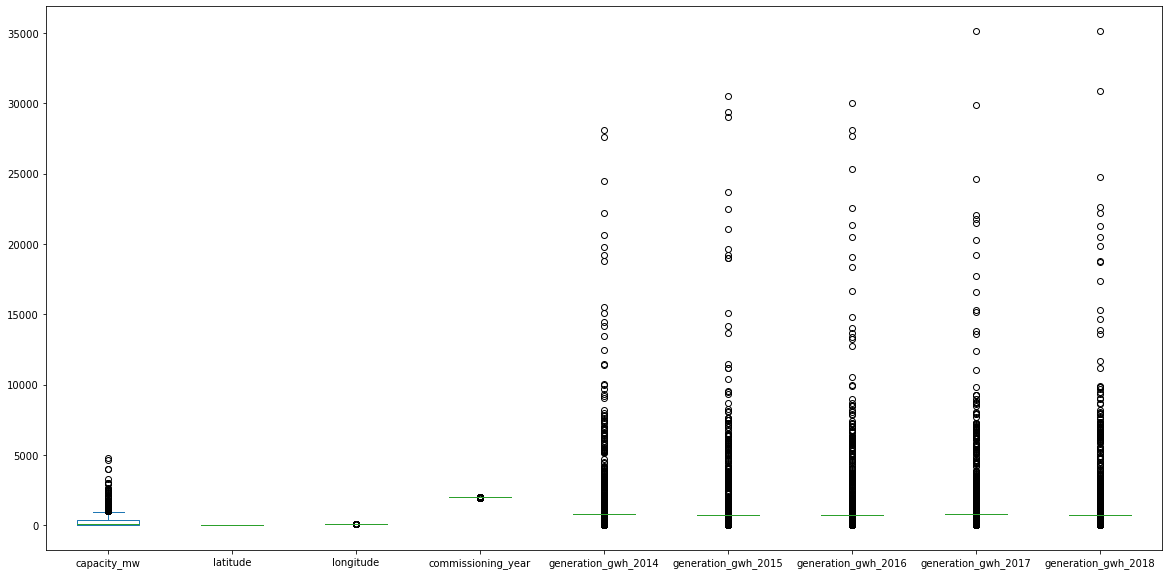

In [98]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing Outliers:

In [99]:
cols=df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [100]:
from scipy.stats import zscore
z=np.abs(zscore(cols))
df_new2=df[(z<3).all(axis=1)]
df_new2

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [101]:
df.shape

(907, 12)

In [102]:
df_new.shape

(871, 12)

# Percentage of Loss:

In [103]:
loss=((907-871)/907)*100
loss

3.9691289966923926

# Skewness:

In [104]:
df_new2.skew()

capacity_mw            2.207091
latitude              -0.126794
longitude              0.960278
commissioning_year    -1.735483
generation_gwh_2014    2.978658
generation_gwh_2015    2.752239
generation_gwh_2016    2.682074
generation_gwh_2017    2.581940
generation_gwh_2018    2.634701
dtype: float64

In [105]:
sk=['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [106]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [107]:
df_new2[sk] = Scaler.fit_transform(df_new2[sk].values)

# Encoding:

In [108]:
cat_cols=[]
for i in df_new.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['primary_fuel', 'source', 'geolocation_source']


In [109]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_new2[cat_cols]=df_new2[cat_cols].apply(enc.fit_transform)

# Correlation:

In [110]:
df_new2.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051646,0.331139,-0.521836,0.158994,-0.388759,0.470868,0.307281,0.326725,0.348560,0.340703,0.351423
latitude,0.051646,1.000000,-0.064781,0.000058,0.087748,0.065905,-0.196598,0.108615,0.103705,0.124835,0.105964,0.111635
longitude,0.331139,-0.064781,1.000000,-0.410049,0.014564,-0.241646,0.299739,0.028705,0.029996,0.084723,0.072899,0.094503
primary_fuel,-0.521836,0.000058,-0.410049,1.000000,-0.052034,0.039778,-0.478696,-0.135754,-0.152945,-0.169552,-0.154784,-0.168056
commissioning_year,0.158994,0.087748,0.014564,-0.052034,1.000000,0.104561,-0.076632,0.107507,0.147526,0.215532,0.198613,0.190022
source,-0.388759,0.065905,-0.241646,0.039778,0.104561,1.000000,-0.500208,-0.014530,-0.017923,-0.015915,-0.010618,-0.022528
geolocation_source,0.470868,-0.196598,0.299739,-0.478696,-0.076632,-0.500208,1.000000,0.011662,0.014385,0.012774,0.008522,0.018081
generation_gwh_2014,0.307281,0.108615,0.028705,-0.135754,0.107507,-0.014530,0.011662,1.000000,0.841661,0.786229,0.715993,0.717419
generation_gwh_2015,0.326725,0.103705,0.029996,-0.152945,0.147526,-0.017923,0.014385,0.841661,1.000000,0.881873,0.773826,0.772907
generation_gwh_2016,0.348560,0.124835,0.084723,-0.169552,0.215532,-0.015915,0.012774,0.786229,0.881873,1.000000,0.897152,0.886958


<AxesSubplot:>

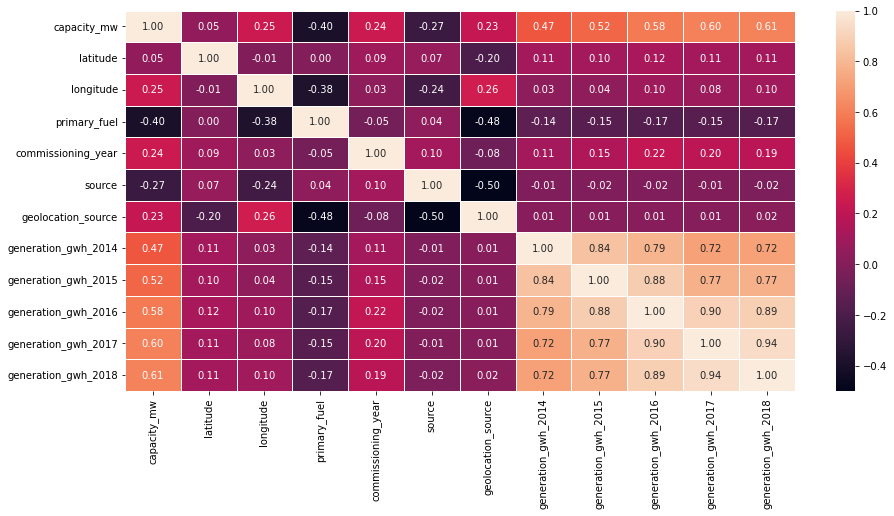

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

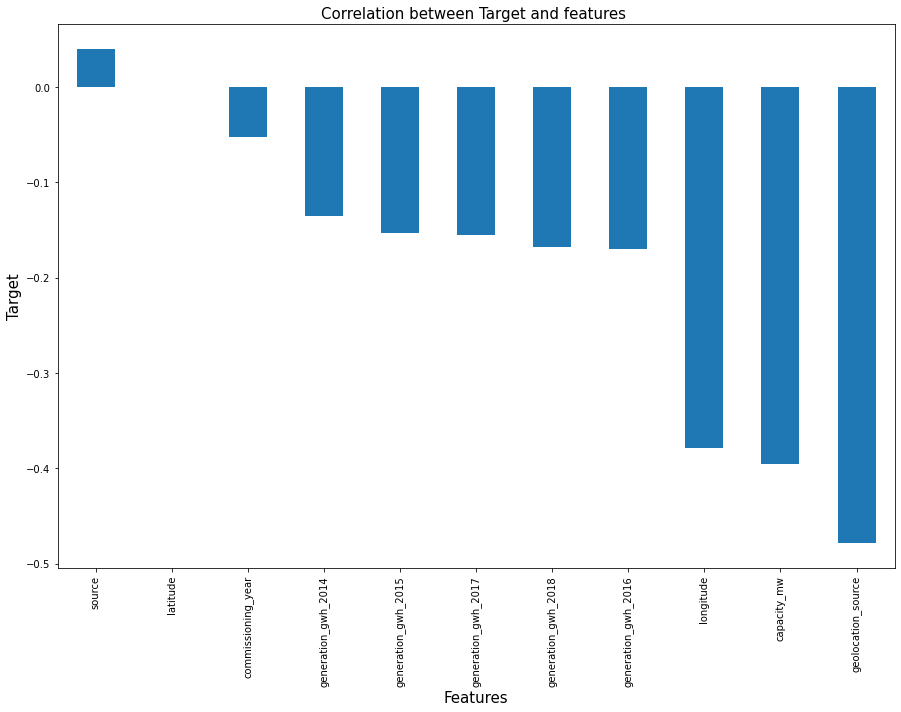

In [112]:
plt.figure(figsize=(15,10))
df_new.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

In [113]:
df_new2.drop(['latitude'],axis=1,inplace=True)

# Seperating the columns into features and target as X and Y:

In [114]:
X = df_new2.drop("primary_fuel",axis=1)
Y = df_new2["primary_fuel"]

# Scaling:

In [116]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=pd.DataFrame(Scaler.fit_transform(X),columns=X.columns)
X

,capacity_mw,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.684521,-0.934302,0.929761,1.421876,-1.056082,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
1,0.238524,-0.510612,0.176018,2.858110,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
2,-0.258955,-2.397092,0.176018,-0.522564,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
3,0.410243,2.420733,0.402141,-0.500469,0.401679,-0.254510,0.107749,0.120391,-0.186140,-0.182719
4,1.741342,1.254159,1.231259,-0.500469,0.401679,1.443372,2.304539,2.292390,1.999708,2.366235
...,...,...,...,...,...,...,...,...,...,...
866,1.683169,0.223088,1.306633,-0.500469,0.401679,-0.029032,-2.472163,-0.830994,0.024967,-0.114246
867,-1.603484,0.413097,0.176018,0.714806,-2.513844,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
868,-0.494119,-0.234349,0.176018,-0.522564,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013
869,0.129055,-0.772306,0.176018,0.317080,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.045013


# VIF:

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.733685,capacity_mw
1,1.183697,longitude
2,1.114581,commissioning_year
3,1.424765,source
4,1.590922,geolocation_source
5,3.606069,generation_gwh_2014
6,6.230549,generation_gwh_2015
7,10.027296,generation_gwh_2016
8,9.818318,generation_gwh_2017
9,8.984528,generation_gwh_2018


# Finding Best Random State:

In [119]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [120]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(X_train, Y_train)
    pred = DTC.predict(X_test)
    acc=accuracy_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8514285714285714  on Random_state  10


In [121]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=maxRS)

# Decision Tree Classifier:

In [123]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(Y_test,pred))
print('Classification Report is ','\n',classification_report(Y_test,pred))

Accuracy_Score is   0.8571428571428571
Confusion Matrix is  
 [[ 5  0  0  0  0  0  0  0]
 [ 2 42  0  2  0  2  0  0]
 [ 0  4  6  4  0  0  0  0]
 [ 0  3  3 44  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  1  0  1  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 20]]
Classification Report is  
               precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.81      0.88      0.84        48
           2       0.60      0.43      0.50        14
           3       0.88      0.88      0.88        50
           4       0.00      0.00      0.00         2
           5       0.60      0.50      0.55         6
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        20

    accuracy                           0.86       175
   macro avg       0.70      0.71      0.70       175
weighted avg       0.85      0.86      0.85       175



# Random Forest Classifier:

In [126]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(Y_test,pred))
print('Classification_Report is ','\n',classification_report(Y_test,pred))

Accuracy_Score is  0.84
Confusion_Matrix is  [[ 4  1  0  0  0  0  0  0]
 [ 2 42  2  2  0  0  0  0]
 [ 0  3  5  6  0  0  0  0]
 [ 0  7  0 43  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  3  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 20]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.72      0.88      0.79        48
           2       0.71      0.36      0.48        14
           3       0.84      0.86      0.85        50
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        20

    accuracy                           0.84       175
   macro avg       0.74      0.67      0.69       175
weighted avg       0.84      0.84      0.83       175



# KNeighbors Classifier:

In [127]:
kn=KNC()
kn.fit(X_train,Y_train)
pred=kn.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.7828571428571428
[[ 5  0  0  0  0  0  0  0]
 [ 2 39  2  1  0  0  0  4]
 [ 0  6  2  6  0  0  0  0]
 [ 0  4  0 42  0  0  0  4]
 [ 0  2  0  0  0  0  0  0]
 [ 1  2  0  1  0  1  0  1]
 [ 0  0  2  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.74      0.81      0.77        48
           2       0.33      0.14      0.20        14
           3       0.84      0.84      0.84        50
           4       0.00      0.00      0.00         2
           5       1.00      0.17      0.29         6
           6       1.00      0.93      0.97        30
           7       0.69      1.00      0.82        20

    accuracy                           0.78       175
   macro avg       0.65      0.61      0.58       175
weighted avg       0.77      0.78      0.76       175



# Support Vector Classifier:

In [128]:
svc=SVC()
svc.fit(X_train,Y_train)
pred=svc.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(Y_test,pred))
print('Classification_Report is ','\n',classification_report(Y_test,pred))

Accuracy_Score is  0.6914285714285714
Confusion_Matrix is  [[ 3  1  0  0  0  0  0  1]
 [ 3 36  0  4  0  0  0  5]
 [ 0  7  1  6  0  0  0  0]
 [ 0 10  0 33  0  0  0  7]
 [ 0  2  0  0  0  0  0  0]
 [ 2  1  1  1  0  0  0  1]
 [ 0  1  0  0  0  0 29  0]
 [ 0  0  0  1  0  0  0 19]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.62      0.75      0.68        48
           2       0.50      0.07      0.12        14
           3       0.73      0.66      0.69        50
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.98        30
           7       0.58      0.95      0.72        20

    accuracy                           0.69       175
   macro avg       0.48      0.50      0.46       175
weighted avg       0.67      0.69      0.66       175



# Cross Validation:

In [129]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(DTC,X,Y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  76.81008119793314
at cv=  3
cross val score =  76.69471106371213
at cv=  4
cross val score =  77.9562846150594
at cv=  5
cross val score =  80.14384236453203
at cv=  6
cross val score =  78.65060620374744
at cv=  7
cross val score =  77.04423963133641


In [131]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(DTC,X,Y,cv=5).mean())

0.7979835796387521


In [132]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc,X,Y,cv=5).mean())

0.825504105090312


In [133]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(kn,X,Y,cv=5).mean())

0.7486174055829228


In [134]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc,X,Y,cv=5).mean())

0.7267717569786536


# Hyper Parameter Tuning:

In [135]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[10,20,30],'criterion':['gini','entropy'],'min_samples_leaf':[2,3,5]}
GCV=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
GCV.fit(X_train,Y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2}

In [136]:
mod = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf=2)

In [137]:
mod.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2)

In [145]:
mod2 = RandomForestClassifier(criterion='entropy',max_features='sqrt',max_depth=10,min_samples_leaf=2)
mod2.fit(X_train, Y_train)
pred = mod2.predict(X_test)
acc = accuracy_score(Y_test,pred)
print(acc*100)

85.71428571428571


In [ ]:
By Hyperparameter Tuning,Our model accuracy is increased to 85%

# Saving the Model:

In [148]:
import pickle
filename='Global-plant.pkl'
pickle.dump(RFC, open(filename,'wb'))